# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.



# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore")


In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
df_test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
df_full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)

df_train.shape, df_test.shape, df_full.shape

((16860, 86), (5856, 52), (22716, 86))

In [3]:
df_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

In [4]:
df_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

In [5]:
df_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289

In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant                      21170 non-null float64
primary_c

In [7]:
df_train = df_train.dropna(subset = (['rougher.output.concentrate_au', 
                                      'rougher.input.feed_au', 
                                      'rougher.output.tail_au', 
                                      'rougher.output.recovery']
                                    )
                          )
C = df_train['rougher.output.concentrate_au'].dropna()  #доля золота в концентрате после флотации/очистки
F = df_train['rougher.input.feed_au'].dropna()          #доля золота в сырье/концентрате до флотации/очистки
T = df_train['rougher.output.tail_au'].dropna()         #доля золота в отвальных хвостах после флотации/очистки

df_train['rougher.output.recovery_new'] = (C*(F-T)) / (F[F!=0]*(C-T)) * 100


recovery = df_train['rougher.output.recovery']
recovery_new = df_train['rougher.output.recovery_new'].fillna(method = 'ffill')

print(recovery.isna().sum(), recovery_new.isna().sum())
print(recovery.shape, recovery_new.shape)

0 0
(14287,) (14287,)


In [8]:
mae = mean_absolute_error(recovery, recovery_new)
print(mae)

9.444891926100695e-15


Судя по значению mae, разница между значением признака 'rougher.output.recovery' и расчетным значением практически равна нулю. Из этого можно сделать вывод, что эффективность обогащения рассчитана правильно.

In [9]:
df_train = df_train.drop('rougher.output.recovery_new', axis=1)

In [10]:
df_train.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state

In [11]:
test_col_dict = df_test.columns
train_col_dict = df_train.columns

for col in train_col_dict:
    if col not in test_col_dict:
        print(col)


final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

Как мы видим, в тестовом датафрейме отсутсвуют параметры полученного продукта для разных этапов очистки, а так же расчетные характеристики флотационной установки


#### Проведем предобработку данных

Так как в таблице df_test нет целевых признаков 'rougher.output.recovery' и 'final.output.recovery' нужно добавить их. Эти целевые признаки можем найти в таблице df_full.

In [12]:
df_test = df_test.merge(df_full[['rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

In [13]:
#проверим таблицы на дубликаты.
print(df_train.duplicated().sum(), df_test.duplicated().sum(), df_full.duplicated().sum())

df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()
df_full = df_full.drop_duplicates()

print(df_train.duplicated().sum(), df_test.duplicated().sum(), df_full.duplicated().sum())

0 6 22
0 0 0


Целевыми признаками являются столбцы 'rougher.output.recovery' и 'final.output.recovery'. Если в этих значения есть пропуски, то от них нужно избавится. 

In [14]:
#удалим пропущенные значения в целевых признаках.
print(df_test['rougher.output.recovery'].isna().sum(), df_test['final.output.recovery'].isna().sum())
df_test = df_test.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])

print(df_test['rougher.output.recovery'].isna().sum(), df_test['final.output.recovery'].isna().sum())

540 436
0 0


In [15]:
#проделаем тоже самое с таблицей df_train
print(df_train['rougher.output.recovery'].isna().sum(), df_train['final.output.recovery'].isna().sum())
df_train = df_train.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])

print(df_train['rougher.output.recovery'].isna().sum(), df_train['final.output.recovery'].isna().sum())

0 138
0 0


Заполним остальные пропуски в данных методом 'ffill'

In [16]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')

# 2. Анализ данных

#### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

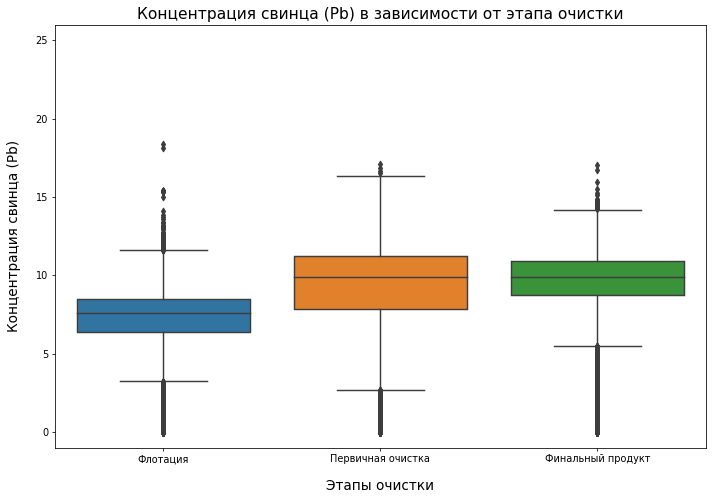

In [17]:
#Построим график распределения для свинца (Pb)
concentrate_pb_col = df_full.columns[df_full.columns.str.contains('concentrate_pb')]

plt.figure(figsize=(12,8), dpi= 70)
sns.boxplot(data=df_full[concentrate_pb_col[[2,1,0]]])
sns.set(style='whitegrid')
plt.title('Концентрация свинца (Pb) в зависимости от этапа очистки', fontsize=16)
plt.ylim(-1, 26)
plt.xlabel('Этапы очистки', labelpad=15, fontsize=14)
plt.ylabel('Концентрация свинца (Pb)', labelpad=15, fontsize=14)
plt.xticks(np.arange(3), ('Флотация','Первичная очистка','Финальный продукт'))
plt.show()

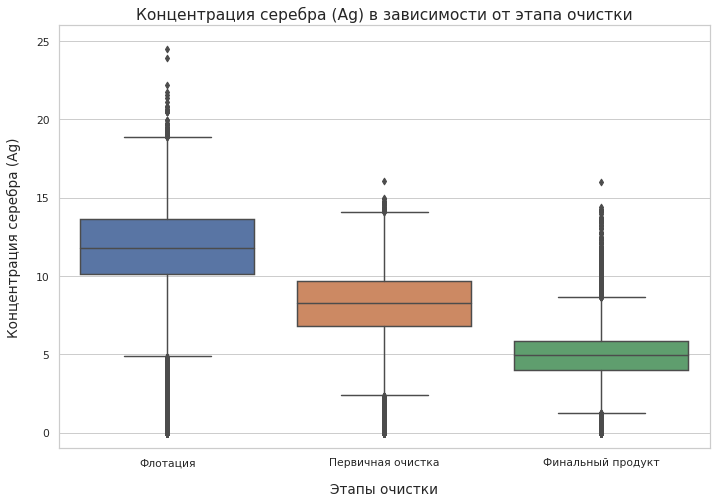

In [18]:
#Построим график распределения для серебра (Ag)
concentrate_ag_col = df_full.columns[df_full.columns.str.contains('concentrate_ag')]

plt.figure(figsize=(12,8), dpi= 70)
sns.boxplot(data=df_full[concentrate_ag_col[[2,1,0]]])
sns.set(style='whitegrid')
plt.title('Концентрация серебра (Ag) в зависимости от этапа очистки', fontsize=16)
plt.ylim(-1, 26)
plt.xlabel('Этапы очистки', labelpad=15, fontsize=14)
plt.ylabel('Концентрация серебра (Ag)', labelpad=15, fontsize=14)
plt.xticks(np.arange(3), ('Флотация','Первичная очистка','Финальный продукт'))
plt.show()

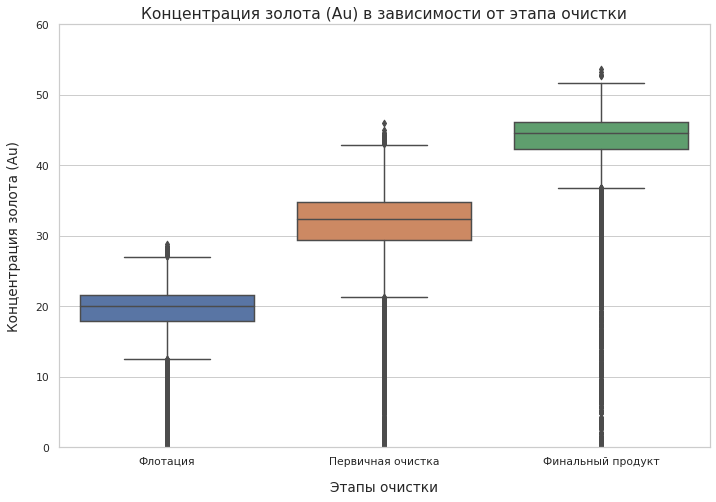

In [19]:
#Построим график распределения для золота (Au)
concentrate_au_col = df_full.columns[df_full.columns.str.contains('concentrate_au')]

plt.figure(figsize=(12,8), dpi= 70)
sns.boxplot(data=df_full[concentrate_au_col[[2,1,0]]])
sns.set(style='whitegrid')
plt.title('Концентрация золота (Au) в зависимости от этапа очистки', fontsize=16)
plt.ylim(0, 60)
plt.xlabel('Этапы очистки', labelpad=15, fontsize=14)
plt.ylabel('Концентрация золота (Au)', labelpad=15, fontsize=14)
plt.xticks(np.arange(3), ('Флотация','Первичная очистка','Финальный продукт'))
plt.show()

#### Выводы:

Из графиков выше мы видим следующее:
- Концентрация золота увеличивается по мере прохождения этапов очистки.
- Концентрация серебра, напротив, становится меньше.
- Концентрация свинца изменяется не так сильно, как у остальных металлов. Концентрация в финальном продукте выше чем на этапе флотации.
- Так же, на всех графиках, мы видим большое количество выборосов значений.


#### Сравним размер в гранул сырья на обучающей и тестовой выборках

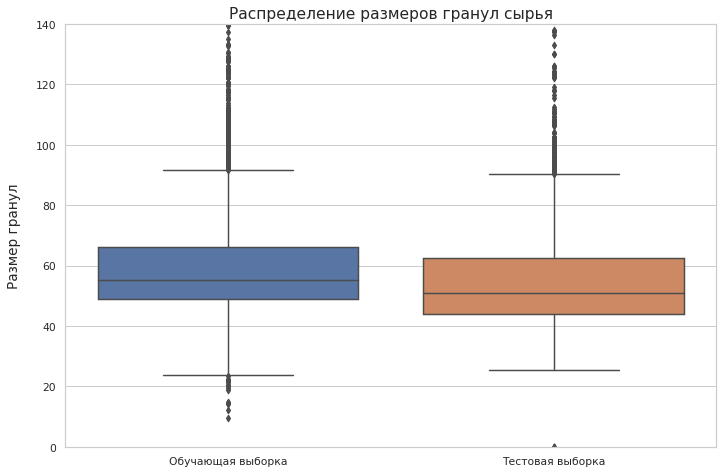

Медиана обучающей выборки 55.269783890501536
Медиана тестовой выборки 50.8468431600362


In [20]:
plt.figure(figsize=(12,8), dpi= 70)
sns.boxplot(data=(df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size']))
sns.set(style='whitegrid')
plt.title('Распределение размеров гранул сырья', fontsize=16)
plt.ylim(0, 140)
plt.ylabel('Размер гранул', labelpad=15, fontsize=14)
plt.xticks(np.arange(2), ('Обучающая выборка','Тестовая выборка'))
plt.show()


print('Медиана обучающей выборки', df_train['rougher.input.feed_size'].median())
print('Медиана тестовой выборки', df_test['rougher.input.feed_size'].median())

На графике распределения размеров гранул сырья мы видим что различия между обучающей и тестовой выборкой имеются, но они не сильно отличаются друг от друга. Медиана обучающей выборки равна 54, а тестовой - 50. 
Но у обучающей выборки количество выббросов больше. Возможно это связано с тем, что выборка больше сама по себе.

###  Исследуем суммарную концентрацию всех веществ на разных стадиях.

In [21]:
rougher_feed = df_train.columns[df_train.columns.str.contains('feed_ag|feed_au|feed_pb|feed_sol')]
df_train['rougher.feed_metal'] = df_train[rougher_feed].sum(axis=1)

rougher_concentrate = df_train.columns[df_train.columns.str.contains('rougher.output.concentrate')]
df_train['rougher.concentrate_metal'] = df_train[rougher_concentrate].sum(axis=1)

final = df_train.columns[df_train.columns.str.contains('final.output.concentrate')]
df_train['final.concentrate'] =  df_train[final].sum(axis=1)

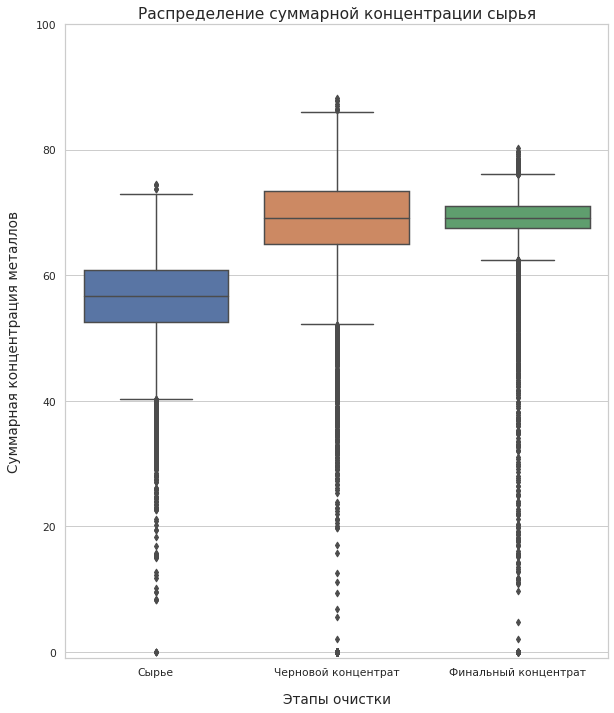

In [22]:
plt.figure(figsize=(10,12), dpi= 70)
sns.boxplot(data=df_train[['rougher.feed_metal', 'rougher.concentrate_metal', 'final.concentrate']])
sns.set(style='whitegrid')
plt.title('Распределение суммарной концентрации сырья', fontsize=16)
plt.ylim(-1, 100)
plt.xlabel('Этапы очистки', labelpad=15, fontsize=14)
plt.ylabel('Суммарная концентрация металлов', labelpad=15, fontsize=14)
plt.xticks(np.arange(3), ('Сырье', 'Черновой концентрат', 'Финальный концентрат'))
plt.show()

In [23]:
#Удалим выбросы в таблице

df_train_clean = df_train[(df_train['final.concentrate'] > 40) & (df_train['rougher.output.recovery'] != 0)]

#### Вывод:

На всех трех этапах мы видим выбросы в первом квартиле. Я считаю, что стоит от них избавится, так как они могут повлиять на модель.

# 3. Модель

Напишем функцию для вычесления иговой sMAPE

In [24]:
def sMAPE(targets, predictions):
    matrix = (abs(np.array(targets) - predictions) 
              / 
             ((abs(np.array(targets)) + abs(predictions)) / 2) * 100
             )
    smape_of_two = np.sum(matrix,axis=0)
    smape_rougher = smape_of_two[1] / len(matrix)
    smape_final = smape_of_two[0] / len(matrix)
    final_sMAPE = (0.25 * smape_rougher) + (0.75 * smape_final)
    return final_sMAPE

    



Выделим целевые признаки и признаки в тренировочно выборке

In [25]:
# признаками будем считать столбцы, которые есть в тестовой и тренировочной выборке.
features = df_train_clean[test_col_dict]
target = df_train_clean[df_train_clean.columns[df_train_clean.columns.str.contains('recovery')]]


df_test = df_test[(df_test['rougher.output.recovery'] != 0) & (df_test['final.output.recovery'] != 0)]
test_feature = df_test.drop(df_test[df_test.columns[df_test.columns.str.contains('recovery')]], axis=1)
test_target = df_test[['final.output.recovery', 'rougher.output.recovery']]

In [26]:
%%time
"""""for n in range(50,100,10):
    for i in range(8,14,2):
        forest_model = RandomForestRegressor(n_estimators=n, max_depth=i, random_state=42)
        sMAPE_score = cross_val_score(forest_model, features, target, cv=5, scoring=make_scorer(sMAPE))
        print('sMAPE =', sMAPE_score.mean(), 'при n=', n, 'i =',i)"""
        
# лучшая sMAPE = 9.306553245369859 при n= 80 i = 8

forest_model = RandomForestRegressor(n_estimators=80, max_depth=8, random_state=42)
sMAPE_score = cross_val_score(forest_model, features, target, cv=5, scoring=make_scorer(sMAPE))
sMAPE_score.mean()

CPU times: user 2min 5s, sys: 80.2 ms, total: 2min 5s
Wall time: 2min 6s


9.306553245369859

In [27]:
%%time

regression_model = LinearRegression()
sMAPE_score = cross_val_score(regression_model,features, target, cv=5, scoring=make_scorer(sMAPE))
sMAPE_score.mean()

CPU times: user 817 ms, sys: 441 ms, total: 1.26 s
Wall time: 1.26 s


9.991969288733808

In [28]:
%%time
for weight in ('uniform','distance'):
    for i in range(24,32, 2):
        KNN_model = KNeighborsRegressor(n_neighbors=i, weights=weight)
        sMAPE_score = cross_val_score(KNN_model, features, target, cv=5,  scoring=make_scorer(sMAPE))
        print('sMAPE =', sMAPE_score.mean(), 'при i =', i, 'и weight =', weight)
        


sMAPE = 11.035965663521274 при i = 24 и weight = uniform
sMAPE = 10.989621711641094 при i = 26 и weight = uniform
sMAPE = 10.940936049608105 при i = 28 и weight = uniform
sMAPE = 10.901869932596382 при i = 30 и weight = uniform
sMAPE = 11.04673436604757 при i = 24 и weight = distance
sMAPE = 11.00208971690503 при i = 26 и weight = distance
sMAPE = 10.954643430561333 при i = 28 и weight = distance
sMAPE = 10.916943345836973 при i = 30 и weight = distance
CPU times: user 44.4 s, sys: 54.5 ms, total: 44.4 s
Wall time: 44.7 s


In [29]:
%%time

L_model = Lasso(alpha=0.2)
sMAPE_score = cross_val_score(L_model,features, target, cv=5, scoring=make_scorer(sMAPE))
sMAPE_score.mean()



CPU times: user 46 s, sys: 45.4 s, total: 1min 31s
Wall time: 1min 31s


9.30931566824859

Лучшие результаты показывает модель Лассо. Проверим ее на тестовой выборке. А также проверим лес регрессии, так как у него второй результат.

In [30]:
%%time

L_model.fit(features, target)
test_prediction = L_model.predict(test_feature)
sMAPE(test_target, test_prediction)


CPU times: user 5.16 s, sys: 4.9 s, total: 10.1 s
Wall time: 10.1 s


7.472000103193764

In [31]:
%%time

forest_model.fit(features, target)
test_prediction = forest_model.predict(test_feature)
sMAPE(test_target, test_prediction)



CPU times: user 32.3 s, sys: 0 ns, total: 32.3 s
Wall time: 32.5 s


7.906065547334827

# Выводы:

Лучшей моделью для данной задачи яляется модель Лассо. у нее самое низкое значение итоговой метрики, а так же она работает быстрее остальных.